# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     1368.
Date:                Sun, 14 Sep 2025   Prob (F-statistic):           5.84e-45
Time:                        13:21:04   Log-Likelihood:                 9.9799
No. Observations:                  50   AIC:                            -11.96
Df Residuals:                      46   BIC:                            -4.312
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9259      0.070     69.944      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.41706823  4.88831514  5.3225182   5.69438758  5.98776043  6.19825637
  6.33399718  6.41427241  6.46637016  6.52109375  6.60770076  6.74909617
  6.95806908  7.23519151  7.56872443  7.93654645  8.30978829  8.65757591
  8.95210307  9.17319978  9.31164616  9.3706873   9.36550004  9.32069949
  9.26629481  9.23275884  9.24602143  9.32320932  9.46983218  9.67887745
  9.93196246 10.20235464 10.45936363 10.67338361 10.82075743 10.88766346
 10.8723864  10.78559912 10.64860912 10.48985781 10.34024762 10.22806483
 10.17433225 10.18935516 10.27102827 10.40518154 10.56790831 10.72949309
 10.85929374 10.93077587]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.91331625 10.772426   10.52630305 10.21641818  9.89736151  9.62347698
  9.43555699  9.35085507  9.35886156  9.42387677]


## Plot comparison

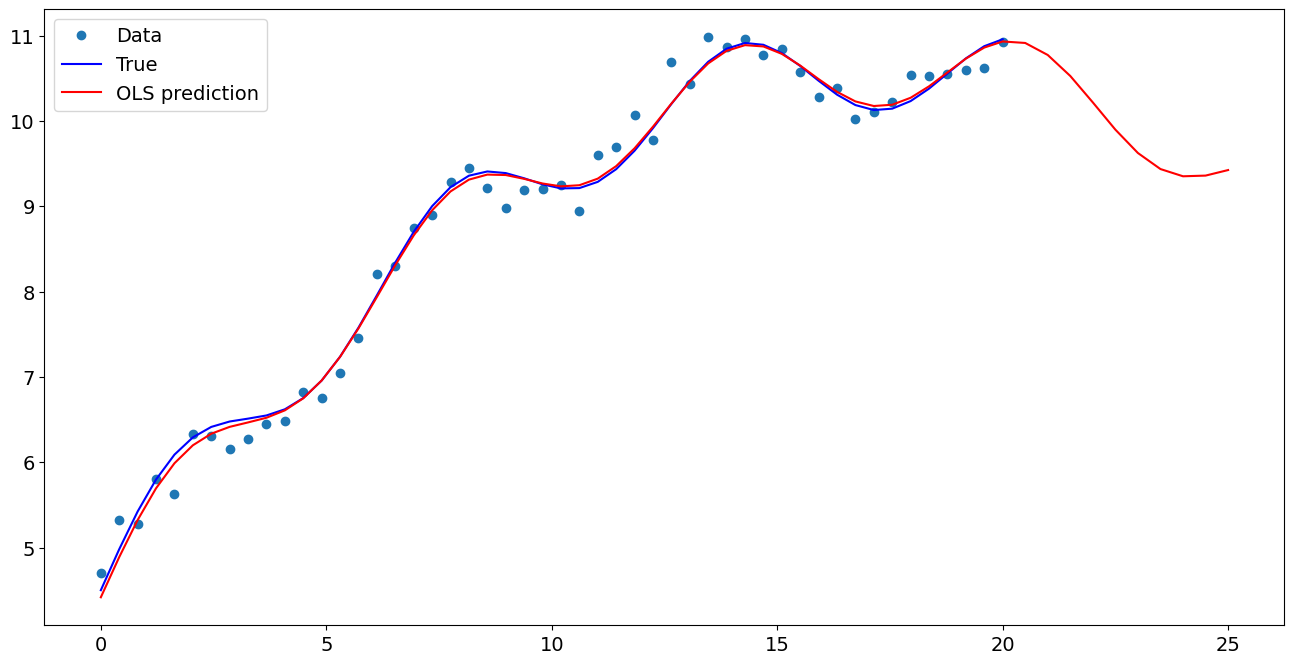

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.925939
x1                  0.508052
np.sin(x1)          0.464041
I((x1 - 5) ** 2)   -0.020355
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.913316
1    10.772426
2    10.526303
3    10.216418
4     9.897362
5     9.623477
6     9.435557
7     9.350855
8     9.358862
9     9.423877
dtype: float64